# Alignment handling and analysis using the Alignment class

#### Contents:
1. Alignment input and output

2. Selecting rows and columns

3. Calculating statistics of alignments

4. Learning exercises to test your skills

Authors: Anna G. Green, Thomas A. Hopf



In [1]:
import numpy as np
from evcouplings.align import Alignment, map_matrix

## 1. Alignment input and output

In [2]:
## Read in a sequence alignment from a fasta file
with open("example/example_aln.a2m", "r") as infile:
    aln = Alignment.from_file(infile, format="fasta")

In [3]:
# Sequence length and number of sequences
print(f"alignment is of length {aln.L} and has {aln.N} sequences")

alignment is of length 423 and has 53 sequences


In [4]:
# Save the alignment to a file
with open("example/_temporary_file.fasta", "w") as outfile:
    aln.write(fileobj=outfile, format="fasta")

In [8]:
d = {
    "seq1": "HELLO",
    "seq2": "WORLD"
    }
aln2 = Alignment.from_dict(d)


['seq1' 'seq2']


## 2. Selecting rows and columns

In [10]:
# aln.matrix returns a numpy matrix of the sequences in the alignment (rows = sequences, columns=positions)
# This matrix can be indexed into as any numpy matrix, with indexing beginning at 0

#sequence 10, positions 1-10 
aln.matrix[9,0:10]


array(['G', 'Q', 'L', 'R', 'Y', 'S', 'V', 'P', 'E', 'E'], dtype='<U1')

In [14]:
# The matrix can be indexed by looking up the index of an identifier of interest

# view the sequence identifiers
print("all the ids:", aln.ids, "\n")

# Find the index of the sequence PCDBI_MOUSE
index = aln.id_to_index["PCDBI_MOUSE"]
print(f"sequence PCDBI_MOUSE has index {index}\n")

# select the sequence of interest
sequence = aln.matrix[index,:]
print("the sequence is", sequence)

all the ids: ['Q641K6_MOUSE' 'B9EJ92_MOUSE' 'Q91Y16_MOUSE' 'PCDA4_MOUSE' 'Q91Y15_MOUSE'
 'B9EKB6_MOUSE' 'Q66JL9_MOUSE' 'Q91Y12_MOUSE' 'PCDA9_MOUSE' 'PCDAA_MOUSE'
 'A0A0A6YY44_MOUSE' 'Q91Y18_MOUSE' 'Q91XZ6_MOUSE' 'B2RWV0_MOUSE'
 'Q91XZ2_MOUSE' 'Q91VE5_MOUSE' 'Q91UZ8_MOUSE' 'A0PJT6_MOUSE'
 'B2RUH4_MOUSE' 'Q8CDY9_MOUSE' 'E9Q5G2_MOUSE' 'Q91Y08_MOUSE'
 'B2RUH7_MOUSE' 'Q91XZ7_MOUSE' 'Q91Y06_MOUSE' 'PCDBE_MOUSE' 'Q6NZD9_MOUSE'
 'Q14BM8_MOUSE' 'Q91VD8_MOUSE' 'PCDBI_MOUSE' 'Q91Y01_MOUSE' 'Q91XZ9_MOUSE'
 'Q91V48_MOUSE' 'Q91XZ8_MOUSE' 'A0A0A6YW27_MOUSE' 'Q91XY6_MOUSE'
 'Q91XY5_MOUSE' 'PCDG4_MOUSE' 'Q91XY3_MOUSE' 'Q91XY2_MOUSE' 'Q6DD96_MOUSE'
 'Q6PHX8_MOUSE' 'Q91XX9_MOUSE' 'Q91XY9_MOUSE' 'Q91XY8_MOUSE'
 'Q91XY7_MOUSE' 'Q91XX8_MOUSE' 'Q91XX7_MOUSE' 'Q91XX6_MOUSE'
 'Q91XX5_MOUSE' 'Q91XX4_MOUSE' 'Q91XX3_MOUSE' 'Q91XX2_MOUSE'] 

sequence PCDBI_MOUSE has index 29

the sequence is ['E' 'L' 'G' 'R' 'Y' 'S' 'V' 'T' 'E' 'E' 'T' 'E' 'R' 'G' 'S' 'F' 'V' 'A'
 'N' 'L' 'A' 'K' 'D' 'L' 'G' 'L' 'G' 'V' 'E' 'A' 'L

In [38]:
# Create a new sequence alignment with just the sequences of interest
ids_to_select = ['Q641K6_MOUSE','B9EJ92_MOUSE','Q91Y16_MOUSE']
selection_index = [aln.id_to_index[x] for x in ids_to_select]
aln_subsection = aln.select(sequences=selection_index)
print(f"the new alignment has {aln_subsection.N} sequences")

the new alignment has 3 sequences


In [42]:
# Say the first 50 positions contain a domain of interest. 
# You can also select only certain columns

aln_subsection = aln.select(columns=range(0,50))
print(f"the new alignment has {aln_subsection.L} positions")

the new alignment has 50 positions


## 3. Calculating statistics of alignments

In [18]:
# The sequence alignment can be converted into a matrix of integers for faster handling
aln.matrix_mapped = map_matrix(aln.matrix, aln.alphabet_map)
print("mapping indices: ",aln.alphabet_map)

mapping indices:  defaultdict(<function map_from_alphabet.<locals>.<lambda> at 0x7fb870516ae8>, {'-': 0, 'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18, 'W': 19, 'Y': 20, 'd': 0, 's': 0, 'm': 0, 'a': 0, 'p': 0, 'l': 0, 'q': 0, '.': 0})


In [20]:
# Display the frequencies of each amino acid in position 21
frequency_21 = aln.frequencies[20,:]
print(f"There are {frequency_21.size} amino acids in the alignment")

for idx, amino_acid in enumerate(aln.alphabet):
    print(f"{amino_acid}, {np.round(frequency_21[idx], 2)}")

#calculates conservation of each positions using the column entropy
cons = aln.conservation()[20]
print(f"position 21 is {np.round(cons,2)} percent conserved")

There are 21 amino acids in the alignment
-, 0.0
A, 0.74
C, 0.0
D, 0.0
E, 0.0
F, 0.0
G, 0.02
H, 0.0
I, 0.02
K, 0.0
L, 0.02
M, 0.0
N, 0.0
P, 0.0
Q, 0.0
R, 0.0
S, 0.11
T, 0.04
V, 0.06
W, 0.0
Y, 0.0
position 21 is 0.68 percent conserved


In [60]:
# calculate the percent identity of every sequence in the alignment to the first sequence
aln.identities_to(aln.matrix[0])


array([0.23877069, 0.23167849, 0.22931442, 0.22931442, 0.23167849,
       0.22931442, 0.23404255, 0.20803783, 0.22222222, 0.22931442,
       0.22931442, 0.22695035, 0.10165485, 0.09219858, 0.09456265,
       0.09692671, 0.09929078, 0.09456265, 0.09929078, 0.09219858,
       0.09456265, 0.10874704, 0.10874704, 0.08510638, 0.09929078,
       0.09692671, 0.09692671, 0.09456265, 0.10165485, 0.08747045,
       0.09456265, 0.10638298, 0.08983452, 0.09929078, 0.10874704,
       0.11111111, 0.11347518, 0.09929078, 0.11111111, 0.11111111,
       0.09929078, 0.11347518, 0.11583924, 0.11111111, 0.11583924,
       0.11111111, 0.10874704, 0.09929078, 0.09692671, 0.09929078,
       0.09456265, 0.09456265, 0.11111111])

## 4. Learning exercises and solutions

### Solutions

In [21]:
# Which sequence contains the most gaps?

#use the "count" method of the class
maximum1 = aln.count(axis="seq",char="-").argmax()

#or, use the numpy sum
maximum2 = (aln.matrix=="-").sum(axis=1).argmax()

assert maximum1==maximum2

print(aln.ids[maximum1])

Q91XX5_MOUSE


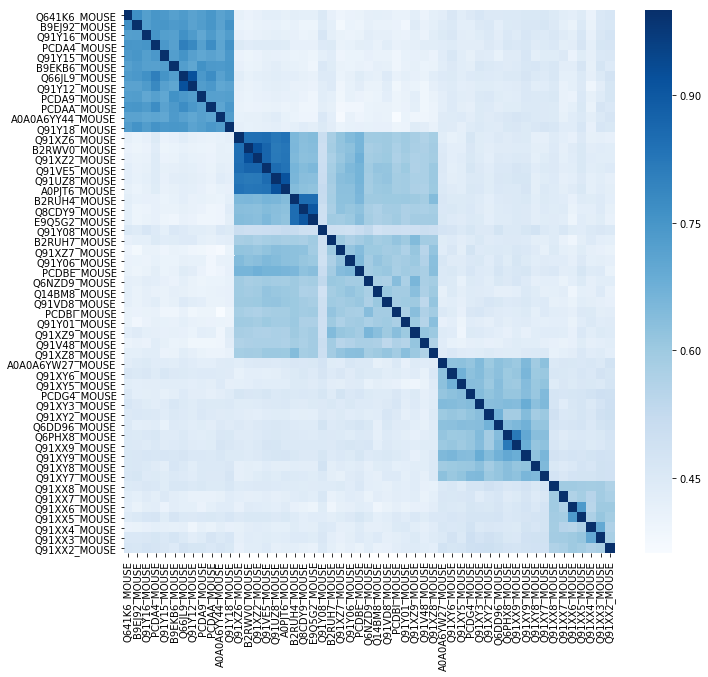

In [22]:
# Calculate the percent identity of all sequences to all other sequences and plot as a heatmap

import seaborn as sns
import matplotlib.pyplot as plt

identity_matrix = np.zeros((aln.N, aln.N))
identity_matrix.fill(np.nan)

#loop through each sequence
for idx in range(identity_matrix.shape[0]):

    #calculate all the percent identitites to that sequence
    idents = aln.identities_to(aln.matrix[idx,:])
    identity_matrix[idx] = idents

#plot the heatmap
fig = plt.figure(figsize=(11,10))
ax = fig.gca
sns.heatmap(identity_matrix,cmap="Blues", xticklabels=aln.ids, yticklabels=aln.ids)

In [165]:
# Create a new alignment of 100 random sequences, where each position is drawn from the frequency distribution of the natural sequences at that site.  
from collections import defaultdict

#Slow, loopy way

aln_dict = defaultdict(str)

for i in range(0,100):
    #name for fake sequence
    seq_name = "rand_"+str(i)
    
    sequence = np.zeros((1,aln.L),dtype=str)
    # for each position
    for col_index in range(aln.L):
        
        # choose a letter 
        letter = np.random.choice(
            list(aln.alphabet),
            1, 
            replace=False,
            p = aln.frequencies[col_index,:]
        )[0]
        #save to new sequence
        sequence[0,col_index] = letter
        
    # save sequence to alignment dictionary
    aln_dict[seq_name] = "".join(list(sequence.reshape(-1)))

rand_aln = Alignment.from_dict(aln_dict)

# verify that the two alignments have similar residue frequencies

print("highest difference in frequency", abs(rand_aln.frequencies - aln.frequencies).max())
    

highest difference in frequency 0.1450943396226415


In [169]:
# faster way!
n_seqs = 10000
sequence_matrix = np.zeros((n_seqs,aln.L),dtype=str)

#loop through columns
for i in range(aln.L):
    
    # make n_seqs random choices
    letters = np.random.choice(
            list(aln.alphabet),
            n_seqs, 
            replace=True,
            p = aln.frequencies[i,:]
        )

    #save the new columns
    sequence_matrix[:,i] = letters
    
aln_dict = {f"rand_{i}":"".join(list(x)) for i,x in enumerate(sequence_matrix)}
rand_aln = Alignment.from_dict(aln_dict)

#verify similar frequencies
print("highest difference in frequency", abs(rand_aln.frequencies - aln.frequencies).max())

highest difference in frequency 0.01198113207547169
